# Introduction to Topic Modelling

## Description

Topic Modelling is all about extracting **topics** from a corpus of documents.  There are numerous methods to do this, however the end goal is the same. Determining what a particular document is about. Topic Modelling and Topic Classification are two entirely different aspects of the same problem and their methodologies and intuition differ considerably. We will learn the differences between a generative model and a discriminative model. And how to implement each of them. We wil stick to the earlier data, the **Consumer Complaints Database** and this time instead of trying to predict the category of the complaint we will attempt to figure out the topics the complaint are all about. 

## Overview

- Introduction to the problem statement **Consumer Complaints Database- Categorize complaints into categories**
- What is Topic Modelling
- What is Topic Classification
- Differences between a generative and a discriminative model
- Named Entity Recognition and introduction to textBlob
- Introduction to LSI
- Introduction to LDA and Gensim
- Creating Bigram and Trigram Models
- Create the Dictionary and Corpus needed for Topic Modeling
- Building the Topic Model
- View the topics in LDA model
- Compute Model Perplexity and Coherence Score
- Building LDA Mallet Model
- How to find the optimal number of topics for LDA?
- Finding the dominant topic in each sentence
- Find the most representative document for each topic
- Topic distribution across documents
- T-Sne and UMAP


## Pre-requisite

- Python (along with NumPy and pandas libraries)
- Basic statistics (knowledge of central tendancy)
- Basics of NLP


## Learning Outcomes

- Understanding the differences between Topic Modelling and Topic Classification
- LDA, Use Cases, Coherence scores
- Introduction to Gensim and Spacy in addition to Sklearn
- NMF

## Chapter 1: Introduction to the problem statement

### 1.1 Introduction to the problem statement: <font color='green'> Categorize complaints into categories</font>

**What is the problem?**
We have covered the problem statement in the earlier tutorial. The data remains the same. However the problem statement is different. Earlier, the idea was to predict the complaint category, from each of the compliants listed in the column, consumer complaint narrative. Now, we have to figure the various **topics** the complaints are all about. The topics could be anything the complaints are about; banks, loans, defaults, etc; 

[https://onedrive.live.com/download?cid=C132C52D965EBCB9&resid=C132C52D965EBCB9%21689&authkey=AJJrYBK5jOE8Rw4] 

Hence, this time, the column of interest is just the consumer complaint narrative. The rest are irrelevant as of now, as we are just intereted in knowing the topics the complaints are all about, and that is described in detail in the consumer complaint narrative column. 

- Consumer Complaint Narrative


**Brief explanation of the dataset & features**

* `Consumer Complaint Narrative`: Is a paragraph (or text) written by the customer explianing his complaint in detail. It is not a numerical or categorical type, the data is a string type consisting of text in the form of paragraphs
    

 
**What we want as the outcome?**

The various topics the complaints are about. 

### 1.2 What is Topic modelling?

***

**Intuition for text**

Topic Modeling is a technique to extract the hidden topics from large volumes of text.
The challenge, however, is how to extract good quality of topics that are clear, segregated and meaningful. This depends heavily on the quality of text preprocessing and the strategy of finding the optimal number of topics. This tutorial attempts to tackle both of these problems.

**Why NLP for this data**

In the last tutorial we covered the basic cleaning of text data - removing stopwords, lemmatization, etc; Cleaning is imperative in topic modelling or topic classification as crud (or garbage data) could offset the topic modelling massively and give completely different results. 

### Have a look at the data set 

In this task you will load Consumer_complaints.csv into a dataframe using pandas and explore the column Consumer Complaint Narrative.


### Instructions
- Load the dataset from `'path'`(given) using the `read_csv()` method from pandas and store it in `'full_data'`. 

- Subset the dataframe  `'full_data'` to only include `"Consumer complaint narrative"` and  `"Product"` and store this dataframe subset in `'data'`

- Rename the column `"Consumer compliant narrative"` to `"X"` and `"Product"` to `"y"` by assining `["X","y"]` to `data.columns` 

- Print out the first value of the `"X"` column to take a look at it.

- Also print column `'y'` and have a look at the various categories that exist in the Product (the renamed y column)s

In [3]:
import pandas as pd
path="../data/new_complaints.csv"

#Loading the dataset
full_data = pd.read_csv(path)

#Subsetting the dataframe to include the columns
data = full_data[["Consumer complaint narrative", "Product"]] 

#Renaming the columns
data.columns = ["X","y"]

#Printing out the a value of the X column. 
print(data["X"][1]) 

When my loan was switched over to Navient i was never told that i had a deliquint balance because with XXXX i did not. When going to purchase a vehicle i discovered my credit score had been dropped from the XXXX into the XXXX. I have been faithful at paying my student loan. I was told that Navient was the company i had delinquency with. I contacted Navient to resolve this issue you and kept being told to just contact the credit bureaus and expalin the situation and maybe they could help me. I was so angry that i just hurried and paid the balance off and then after tried to dispute the delinquency with the credit bureaus. I have had so much trouble bringing my credit score back up.


## Chapter 2: What is Topic Classification?

### 2.1 Introduction

***

Topic Classification - and Topic Modelling are two different aspects of the same problem. To figure out the topics from a particular snippet of text data. End result being the same, Topic modelling and Topic classification are different ends of the spectrum converging to the same midpoint. 

Topic classification is simply put, finding the different topics text is about. This is achieved either by a simple counter function finding the different counts of the various words in the text and then figuring out what these words are and assign the document to these words **as topics**. 

The problem with this approach however being that, not all words are topics. The word, "advice" might be one of the top words in the document, doesn't necessarily imply that the document is about advice. A brilliant yet impeccably simple way to get around this is to use something called NER or Named Entity Recognition, finding out the Places, Animals, People or **Named Entities** the document is about and then conclude the document is about the highest appearing NERs. We will get to the core basics of NER eventually. 

Another additional method we use is called POS or **Parts of Speech Tagging**, finding out the various aspects of the document, such as Nouns, Verbs, etc; So we know that the word food has appeared multupl times, and it being a noun, the document is about food and an additional verb such as "reviewing". The document is about reveweing food!



### 2.2 Why is it important to determine topics

***

Knowing what people are talking about and understanding their problems and opinions is highly valuable to businesses, administrators, political campaigns. And it’s really hard to manually read through such large volumes and compile the topics.

Thus is required an automated algorithm that can read through the text documents and automatically output the topics discussed.

We will deal with each of the above concepts in detail below. 

## Chapter 3: What is Topic Modelling?

### 3.1 Introduction - The difference between a generative model and a discriminative model. 

***

Topic Modelling unlike Topic classification assigns random topics to a document **before parsing the document!**

In topic classification, the topics are found after finding the words present in the document, Topic modelling, topics which are essentially combination of words (not single words alone) are assigned to the document beforehand and then the probabilty of those topics belonging to the document is determined. The word-combos with the highest probability are assigned to the document as the topics. 


Topic modelling is a generative model as the number of topics are decided beforehand and not decided after finding the most commonly occuring words in the document, in other words, any word-combo can be a topic, based on words around it, The probabilities are then assigned of those word-combinations belong to that document based on occurence and thee topics determined. Starts with the generation of the words first and then tries to fit the document to those words. 

Topic Classification is a discriminative model, as it simply discrimates the topics **present** in the document. The words are determined based on their presence in the document.

## Chapter 4: Getting started with Topic classification and Topic modelling 

### 4.1 Introduction - Topic Classfication

***

Topic modeling is the process of discovering groups of co-occurring words in text documents. These group co-occurring related words makes "topics".

LSA or Latent Semantic analysis (also referred to as LSI- Latent Semantic Index) is a Topic modelling technique. Conceptually, similar to the the SVD, LSA facilitates a term-document matrix, which is then broken down to determine the **topics** or **combination of terms** in the documents, which are the supposed topics. LSA is typically a PCA technique. 

Before we discuss SVD, Term Document matrices and the rest, let us start from scratch and do a normal topic classification on the first five non empty complaints of the comsumer complaints database.


### Instructions


- Drop all nan rows from dataframe.

- Take the first 5 rows of the column X, convert them to lowercase and assign them to a list called `'BoW'`.

- Tokenize `'BoW'` into constituent words using `"word_tokenize()"` and store it back into `'bow'`. 

- Remove stop words (defined in the custom list) from `'BoW'` and store it back into `'BoW'`

- Initialize a wordnet lemmatizer object `"WordNetLemmatizer"` and store it in a variable called `'lemmatizer'`

- Lemmatize `'BoW'` using `'lemmatizer'` and assign the list back to `'BoW'`.


In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation
from nltk.tokenize import word_tokenize
# nltk.download('wordnet')
# nltk.download('punkt')

custom = list(set(stopwords.words('english')))+list(punctuation)+['``', "'s", "...", "n't"]

#Code begins

#Dropping the nan values
data = data.dropna()

# #Storing first five complaints 
# first_five_complaints = data.head()

# #Converting the column 'X'   
# BoW = first_five_complaints["X"][:5].str.lower().tolist()

#Converting the first 5 rows of column 'X' into a bag of words
BoW=data["X"][:5].str.lower().tolist()




#Tokenizing the words
BoW = [word_tokenize(x) for x in BoW]

#Creating the sublist 
BoW = [item for sublist in BoW for item in sublist] #$$#@#^$%$UGdkajd;slkd;alsdk;asldk;alsdk

#Removing the stopwords 
BoW = [x for x in BoW if x not in custom]

#Initializing wordnet lemmatizer
lemmatizer = WordNetLemmatizer()


#Lemmatizing the bag of words
BoW = [lemmatizer.lemmatize(x) for x in BoW]

#Code ends

Now that we have the bag of words, we need to figure out the topics from the same. A discriminative model, where we deduce the topics from the bag of words, based on what is present and what is not. One way to do that is NER or Named Entity Recognition...

### 4.2 Named Entity recognition and introduction to TextBlob
***

NER typically identifies, entities such as animals, places, things etc; from text. Evidently, that will be massively helpful in determining which entities are present in the bag of words, hence zeroing in on the topics. Textblob is a library like NLTK. Textblob has certain useful functionalities such as tags, tokenize, polarity analysis etc; however, we will stick to just using textblob to find the Named Entities for now. 

Textblob needs a string to work with and doesn't work with tokenized sentences. Hence it makes sense to convert all of the words in our BoW list, and join them into one string using the join command. Let's try that and see what we get. 

# Textblob

- Join the previously created bag of words `'bow'` back into a string using `"join()"` method and store the result in `'BoW_joined'`.

- Convert `'Bow_joined'` into a textblob using `"tb()"` method and store the result into `''blob`.

In [15]:
#Importing header files
import nltk
# nltk.download('averaged_perceptron_tagger')

from textblob import TextBlob as tb

#Join the list back to sentences
BoW_joined= " ".join(BoW)

#Converting the data to textblob
blob = tb(BoW_joined)

#First 10 tags
blob.tags[:10]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\nnair\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


[('loan', 'NN'),
 ('switched', 'VBD'),
 ('navient', 'JJ'),
 ('never', 'RB'),
 ('told', 'VBD'),
 ('deliquint', 'NN'),
 ('balance', 'NN'),
 ('xxxx', 'NN'),
 ('going', 'VBG'),
 ('purchase', 'NN')]

If we print out the length of our blob, we will get

```python
print(len(BoW))
```

**Output:**

```python
602
```

Our original BoW had 602 words. Which means for each of the words we will have a tag. The various tags such as "NN", "DT" have a more detailed explanation up here, what each tag stands for. Expanding that list below we see that the tags are such:

The entire list can be found here: https://www.clips.uantwerpen.be/pages/mbsp-tags

<img src="../images/tag.png">

Here's the problem. We get 602 tags. We need a smaller number. We cannot say the first 5 documents are about 602 topics which is basically about all the words combined. One way to do this would be to determine the tags of the top 5 or 10 most frequent words in this unique list and then take the tags for those words. 

```python

from collections import Counter
d = dict(Counter(BoW))
import operator
sorted_d = sorted(d.items(), key=operator.itemgetter(1), reverse=True)
print("Top 10 words:\n",sorted_d[:10])

```

**Output:**
```python
"Top 10 words:"

[('xxxx', 15),
 ('payment', 12),
 ('closing', 12),
 ('account', 11),
 ('credit', 8),
 ('mortgage', 8),
 ('rate', 8),
 ('would', 8),
 ('bank', 7),
 ('fixed', 7)]

```
The topics of the documents are about

- Payment
- Closing
- account
- Credit
- Mortgage
- Rate
- would
- bank
- fixed


However words like "would" are not important as they do not really imply a topic, which means we will have to repeat this exercise for the **Nouns** only. Why? **Because the nouns usually are the places, names of people, banks etc; **



### Instructions
- Get the tags of all the words from `'BoW'` using `blob.tags` and store the result in a variable called `'tags'`


- Extract the ones which are nouns only ("NN") to a list called `'nouns'`


- The words which have appeared most frequently, the top 10 words are taken into a list called `'top_words'`


- Compare the `'top_words'` with `'nouns'` and store the common elements in `'top_nouns'`


- Print `'top_nouns'`

In [16]:
import nltk

top_words = sorted_d[:10]
top=[]
for x in top_words:
    top.append(x[0])

# nltk.download('brown')

#Code begins
tags = blob.tags
nouns = []
for x in tags:
    if x[1]=="NN":
        nouns.append(x[0])
        
top_nouns=[x for x in nouns if x in top]
top_nouns  = list(set(top_nouns))
top_nouns

['account', 'rate', 'credit', 'mortgage', 'payment', 'closing', 'bank', 'xxxx']

The top 6 topics of the 5 complaints are now:
- payment
- credit
- account
- rate
- mortage
- bank

That's topic classification 101. 

### 4.3 Topic Modelling and introduction to LSI

***

The first complaint which looks like this, the topics can be inferred by reading through. 

<img src="../images/first.png">
<img src="../images/1.png">

Words such as Loans, credit scores, credit bureau all are financial terms and can be classified collectively as Topic 1, vehicle is a different topic from these words, company is a third topic and so on. A good topic model will identify similar words and put them under one group or topic. The most dominant topic in the above example is Topic 1, which indicates that this piece of text is primarily about loans and credit

Topic modelling in a way is an unsupervised technique, because, unlike topic classification which just involves figuring out what the words that are contained in the document and assigning them as topics, in topic modelling, the topics are words which are related to each other (The topics are combination of words). Hence multiple words together form a topic, and multiple topics can exist in a document. 

Topic modeling helps in exploring large amounts of text data, finding clusters of words, similarity between documents, and discovering abstract topics. Topic classification just maps words to documents, whereas topic modelling attempts to discover underlying words and combinations of words which are not visible doing just a mere preliminary analysis of the words contained. These underlying combinations are abstract or hidden and have to be figured out by running specific NLP techniques, hence the "Latent" in LSA. 

An example should make this clearer. 

"He was asked to close the case"
"He is close to his friend". 

The word close used in very different contexts, just a normal topic classification, wouldn't help in determining the context of the word "close". To determine the context, we will have to see the words used around the word of interest and assign these combinations as topics. For instance, close - Case is a topic 1 and close - friend is topic 2 in this case. These combinations are not visible inherenetly, unless you capture the context around the word of interest and that is Topic modelling attempts to do. 

LSA is a topic modelling technique, hence the number of topics have to determined beforehand and then assigned to the documents.For m documents, you will assign k topics to be extracted out of these documents. 

k = number of topics we intend to extract

m = number of documents

n = number of unique words in all the documents combined

So if we had a word **X** document matrix, the values for the words being the TF-IDF scores for each word depending on how many times it has appeared in the document and across all documents, it would look like below. 

<img src="../images/2.png">

To extract K topics out of this MXN matrix, we will have to break it down into 2 matrices, M X K and K X N the product of which would be M X N or our original matrix. This makes sense as the rows and columns of 2 matrices determine the shape of the product matrix and that is possible if and only if the number of columns of matrix 1 is equal to the number of rows of matrix 2. 

Now that we understand the math behind LSA, let's implement LSA in python with the first 5 complaints yet again. 

**First five complaints:
```python


```

# First Five Complaints


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents called sents

# Subsetting the 'X' column
all_text = first_five_complaints[["X"]]
# all_text = pd.DataFrame(all_text)
# all_text.columns = ["Text"]

#Converting the text to lowercase
all_text["X"] = all_text["X"].str.lower()

# Initialising the tfidf vectorizer
tfidf = TfidfVectorizer(stop_words="english")

#Vectorizing 'X' column
vector =tfidf.fit_transform(all_text["X"])

#Converting vector into array
X= vector.toarray()

pd.DataFrame(X) #This below essentially is our Document - WoRD matrix

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,0,1,2,3,4,5,6,7,8,9,...,279,280,281,282,283,284,285,286,287,288
0,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.203219,0.000000,0.00000
1,0.00000,0.000000,0.000000,0.00000,0.372708,0.249607,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
2,0.06819,0.055016,0.000000,0.06819,0.000000,0.045668,0.000000,0.000000,0.06819,0.000000,...,0.000000,0.06819,0.204571,0.204571,0.000000,0.000000,0.06819,0.038417,0.055016,0.06819
3,0.00000,0.085335,0.105771,0.00000,0.000000,0.188896,0.035257,0.070514,0.00000,0.035257,...,0.035257,0.00000,0.000000,0.000000,0.035257,0.035257,0.00000,0.158906,0.085335,0.00000
4,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.462143,0.000000,0.00000


In [10]:
from sklearn.decomposition import TruncatedSVD

svd_model = TruncatedSVD(n_components=5, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(vector_values_array)

len(svd_model.components_)

5

The components of svd_model are our topics, and we can access them using svd_model.components_. Finally, let’s print a few most important words in each of the 5 topics and see how our model has done.

In [11]:
terms = tfidf.get_feature_names()
topics = []
for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    topics.append("Topic "+str(i)+": ")
    for t in sorted_terms:
        topics.append(t[0])
final_topic_list = [topics[i:i+8] for i in range(0, len(topics), 8)]
for x in final_topic_list:
    print (x)

['Topic 0: ', 'xxxx', 'credit', 'score', 'significant', 'navient', 'closing', 'told']
['Topic 1: ', 'mortgage', 'account', 'payment', 'closing', 'bb', 'program', 'access']
['Topic 2: ', 'access', 'capital', 'let', 'monitoring', 'spending', 'sign', 'program']
['Topic 3: ', 'closing', 'fixed', 'form', 'property', 'disclosure', 'rate', 'close']
['Topic 4: ', 'significant', 'xxxx', 'agencies', 'decrease', 'gone', 'month', 'points']


In [12]:
# import matplotlib.pyplot as plt
# import umap.umap_ as umap

# X_topics = svd_model.fit_transform(vector_values_array)
# embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(X_topics)

# plt.figure(figsize=(7,5))
# plt.scatter(embedding[:, 0], embedding[:, 1], 
# c = dataset.target,
# s = 10, # size
# edgecolor='none'
# )
# plt.show()

### 4.4 Introduction to LDA and Gensim

***

LDA stands for Latent Dirichlet Allocation. 

LDA’s approach to topic modeling is it considers each document as a collection of topics in a certain proportion. And each topic as a collection of keywords, again, in a certain proportion. \

LSI learns latent topics by performing a matrix decomposition (SVD) on the term-document matrix.

LDA is a generative probabilistic model, that assumes a Dirichlet prior over the latent topics.

Briefly put, it answers the question: “given this type of distribution, what are some actual probability distributions I am likely to see?”

Consider the very relevant example of comparing probability distributions of topic mixtures. Let’s say the corpus we are looking at has documents from 3 very different subject areas. If we want to model this, the type of distribution we want will be one that very heavily weights one specific topic, and doesn’t give much weight to the rest at all. If we have 3 topics, then some specific probability distributions we’d likely see are:

Mixture X: 90% topic A, 5% topic B, 5% topic C
Mixture Y: 5% topic A, 90% topic B, 5% topic C
Mixture Z: 5% topic A, 5% topic B, 90% topic C


LDA assumes documents are produced from a mixture of topics. Those topics then generate words based on their probability distribution. Given a dataset of documents, LDA backtracks and tries to figure out what topics would create those documents in the first place.


Once you provide the algorithm with the number of topics, all it does it to rearrange the topics distribution within the documents and keywords distribution within the topics to obtain a good composition of topic-keywords distribution.

Again, When I say topic, what is it actually and how it is represented?

A topic is nothing but a collection of dominant keywords that are typical representatives. Just by looking at the keywords, you can identify what the topic is all about.

Just like the LSA, It Iterates through each word “w” for each document “d” and tries to adjust the current topic – word assignment with a new assignment. A new topic “k” is assigned to word “w” with a probability P which is a product of two probabilities p1 and p2.

For every topic, two probabilities p1 and p2 are calculated. P1 – p(topic t / document d) = the proportion of words in document d that are currently assigned to topic t. P2 – p(word w / topic t) = the proportion of assignments to topic t over all documents that come from this word w.

The current topic – word assignment is updated with a new topic with the probability, product of p1 and p2 . In this step, the model assumes that all the existing word – topic assignments except the current word are correct. This is essentially the probability that topic t generated word w, so it makes sense to adjust the current word’s topic with new probability.

After a number of iterations, a steady state is achieved where the document topic and topic term distributions are fairly good. This is the convergence point of LDA.

**Importing the necessary packages**

In [13]:
!pip install spacy
!pip install pyLDAvis
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

  Using cached https://files.pythonhosted.org/packages/76/f4/7146c3812f96fcaaf2d06ff6862582302626a59011ccb6f2833bb38d80f7/regex-2018.01.10.tar.gz
  Running setup.py bdist_wheel for regex ... error
  Complete output from command /Users/Arunabh/anaconda3/bin/python -u -c "import setuptools, tokenize;__file__='/private/var/folders/43/2l1gzkyn637fc6lkn5yxzg7w0000gn/T/pip-install-qmg4xhnd/regex/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d /private/var/folders/43/2l1gzkyn637fc6lkn5yxzg7w0000gn/T/pip-wheel-e1ajhbid --python-tag cp37:
  /Users/Arunabh/anaconda3/lib/python3.7/site-packages/setuptools/dist.py:398: UserWarning: Normalizing '2018.01.10' to '2018.1.10'
    normalized_version,
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.macosx-10.7-x86_64-3.7
  copying regex_3/regex.py -> build/lib.macosx-10.7-x86_64-3.7
  copying regex_3/_re

In [14]:
list_of_docs = first_five_complaints["X"].tolist()
len(list_of_docs)
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in list_of_docs] 

In [15]:
!pip install gensim
import gensim
from gensim import corpora
dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [16]:
!pip install pyLDAvis
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel



# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

If you want to see what word a given id corresponds to, pass the id as a key to the dictionary.

In [17]:
print ([[(dictionary[id], freq) for id, freq in cp] for cp in doc_term_matrix[:1][:10]])

[[('angry', 1), ('back', 1), ('balance', 2), ('bringing', 1), ('bureau', 2), ('company', 1), ('contact', 1), ('contacted', 1), ('could', 1), ('credit', 4), ('delinquency', 2), ('deliquint', 1), ('discovered', 1), ('dispute', 1), ('dropped', 1), ('expalin', 1), ('faithful', 1), ('going', 1), ('help', 1), ('hurried', 1), ('issue', 1), ('kept', 1), ('loan', 2), ('maybe', 1), ('me', 1), ('much', 1), ('navient', 3), ('never', 1), ('not', 1), ('paid', 1), ('paying', 1), ('purchase', 1), ('resolve', 1), ('score', 2), ('situation', 1), ('student', 1), ('switched', 1), ('told', 3), ('tried', 1), ('trouble', 1), ('up', 1), ('vehicle', 1), ('with', 1), ('xxxx', 3)]]


In [18]:
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(doc_term_matrix, num_topics=5, id2word = dictionary, passes=50)
print(ldamodel.print_topics(num_topics=5, num_words=7))

[(0, '0.003*"account" + 0.003*"tried" + 0.003*"program" + 0.003*"sign" + 0.003*"one" + 0.003*"s" + 0.003*"please"'), (1, '0.048*"xxxx" + 0.041*"credit" + 0.028*"score" + 0.021*"told" + 0.021*"navient" + 0.015*"me" + 0.015*"s"'), (2, '0.021*"payment" + 0.021*"closing" + 0.017*"account" + 0.014*"rate" + 0.014*"mortgage" + 0.014*"would" + 0.014*"xxxx"'), (3, '0.003*"account" + 0.003*"tried" + 0.003*"program" + 0.003*"sign" + 0.003*"one" + 0.003*"s" + 0.003*"please"'), (4, '0.016*"program" + 0.016*"one" + 0.016*"spending" + 0.016*"capital" + 0.016*"monitoring" + 0.016*"let" + 0.016*"access"')]


Topic 0 is a represented as 0.028“closing” + 0.021“account” + 0.016“rate” +.... and so on.

It means the top 7 keywords that contribute to this topic are: ‘closing’, ‘xxxx’, ‘account’, 'rate'.. and so on and the weight of ‘closing’ on topic 0 is 0.028.

The weights reflect how important a keyword is to that topic.

Looking at these keywords, can you guess what this topic could be? You may summarise it to ‘closing’ or 'account'.

Likewise, can you go through the remaining topic keywords and judge what the topic is?

A better way to display this would be like so. 

In [19]:
pprint(ldamodel.print_topics())
doc_lda = ldamodel[doc_term_matrix]

[(0,
  '0.003*"account" + 0.003*"tried" + 0.003*"program" + 0.003*"sign" + '
  '0.003*"one" + 0.003*"s" + 0.003*"please" + 0.003*"requested" + 0.003*"let" '
  '+ 0.003*"capital"'),
 (1,
  '0.048*"xxxx" + 0.041*"credit" + 0.028*"score" + 0.021*"told" + '
  '0.021*"navient" + 0.015*"me" + 0.015*"s" + 0.015*"loan" + 0.015*"balance" + '
  '0.015*"bureau"'),
 (2,
  '0.021*"payment" + 0.021*"closing" + 0.017*"account" + 0.014*"rate" + '
  '0.014*"mortgage" + 0.014*"would" + 0.014*"xxxx" + 0.012*"bank" + '
  '0.012*"fixed" + 0.011*"form"'),
 (3,
  '0.003*"account" + 0.003*"tried" + 0.003*"program" + 0.003*"sign" + '
  '0.003*"one" + 0.003*"s" + 0.003*"please" + 0.003*"requested" + '
  '0.003*"spending" + 0.003*"access"'),
 (4,
  '0.016*"program" + 0.016*"one" + 0.016*"spending" + 0.016*"capital" + '
  '0.016*"monitoring" + 0.016*"let" + 0.016*"access" + 0.016*"tried" + '
  '0.016*"sign" + 0.016*"account"')]


Model perplexity and topic coherence provide a convenient measure to judge how good a given topic model is. Lower the better.

In [20]:
# Compute Perplexity
print('\nPerplexity: ', ldamodel.log_perplexity(doc_term_matrix))  
# a measure of how good the model is. lower the better.


Perplexity:  -6.08902470547724


In [21]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=doc_clean, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.30502738026128146


Now that the LDA model is built, the next step is to examine the produced topics and the associated keywords. There is no better tool than pyLDAvis package’s interactive chart and is designed to work well with jupyter notebooks.

### 4.5 Visualize the topics

***

In [22]:
!pip install pyLDAvis
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)
vis

/Users/Arunabh/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.103276  0.016312       1        1  84.437187
1      0.128666  0.009813       2        1  13.617956
4     -0.012869 -0.039117       3        1   1.630477
3     -0.006260  0.006496       4        1   0.157191
0     -0.006260  0.006496       5        1   0.157191, topic_info=     Category       Freq        Term      Total  loglift  logprob
term                                                             
45    Default   9.000000     account   9.000000  30.0000  30.0000
43    Default  11.000000        xxxx  11.000000  29.0000  29.0000
9     Default   5.000000      credit   5.000000  28.0000  28.0000
110   Default  10.000000     payment  10.000000  27.0000  27.0000
176   Default  10.000000     closing  10.000000  26.0000  26.0000
147   Default   7.000000       would   7.000000  25.0000  25.0000
104   Default   7.000000    mortgage   7.000000  24.0000  24.0000
118   Default   7.000000        rate   7.000000  23.0000  23.0000
64    Default   6.000000        bank   6.000000  22.0000  22.0000
215   Default   6.000000       fixed   6.000000  21.0000  21.0000
217   Default   5.000000        form   5.000000  20.0000  20.0000
269   Default   5.000000    property   5.000000  19.0000  19.0000
78    Default   4.000000         day   4.000000  18.0000  18.0000
149   Default   4.000000        year   4.000000  17.0000  17.0000
306   Default   4.000000           u   4.000000  16.0000  16.0000
194   Default   4.000000  disclosure   4.000000  15.0000  15.0000
254   Default   4.000000          nt   4.000000  14.0000  14.0000
66    Default   3.000000    biweekly   3.000000  13.0000  13.0000
65    Default   3.000000          bb   3.000000  12.0000  12.0000
60    Default   3.000000      amount   3.000000  11.0000  11.0000
106   Default   3.000000      number   3.000000  10.0000  10.0000
119   Default   3.000000    received   3.000000   9.0000   9.0000
115   Default   3.000000     product   3.000000   8.0000   8.0000
187   Default   3.000000     decided   3.000000   7.0000   7.0000
55    Default   3.000000          30   3.000000   6.0000   6.0000
74    Default   3.000000    checking   3.000000   5.0000   5.0000
174   Default   3.000000       close   3.000000   4.0000   4.0000
240   Default   3.000000      letter   3.000000   3.0000   3.0000
22    Default   4.000000        loan   4.000000   2.0000   2.0000
8     Default   5.000000       could   5.000000   1.0000   1.0000
...       ...        ...         ...        ...      ...      ...
0      Topic5   0.002975       angry   0.881432   0.7642  -5.7869
39     Topic5   0.002975     trouble   0.881432   0.7642  -5.7869
40     Topic5   0.002975          up   0.881432   0.7642  -5.7869
41     Topic5   0.002975     vehicle   0.881432   0.7642  -5.7869
42     Topic5   0.002975        with   0.881432   0.7642  -5.7869
27     Topic5   0.002975       never   0.881432   0.7642  -5.7869
28     Topic5   0.002975         not   0.881432   0.7642  -5.7869
32     Topic5   0.002975     resolve   0.881432   0.7642  -5.7869
23     Topic5   0.002975       maybe   0.881432   0.7642  -5.7869
14     Topic5   0.002975     dropped   0.881432   0.7642  -5.7869
3      Topic5   0.002975    bringing   0.881432   0.7642  -5.7869
15     Topic5   0.002975     expalin   0.881432   0.7642  -5.7869
5      Topic5   0.002975     company   0.881432   0.7642  -5.7869
45     Topic5   0.002975     account   9.328659  -1.5951  -5.7869
38     Topic5   0.002975       tried   1.902429  -0.0051  -5.7869
50     Topic5   0.002975     program   1.342879   0.3432  -5.7869
51     Topic5   0.002975        sign   2.230306  -0.1641  -5.7869
49     Topic5   0.002975         one   1.343003   0.3431  -5.7869
122    Topic5   0.002975           s   4.102488  -0.7736  -5.7869
265    Topic5   0.002975      please   3.543147  -0.6270  -5.7869
278    Topic5   0.002975   requested   2.655899  -0.3388  -5.7869
43     Topic5  

In [23]:
# <img src="vis.png">

### 4.6 Building the LDA Mallet model

***
So far you have seen Gensim’s inbuilt version of the LDA algorithm. Mallet’s version, however, often gives a better quality of topics.

Gensim provides a wrapper to implement Mallet’s LDA from within Gensim itself. You only need to download the zipfile, unzip it and provide the path to mallet in the unzipped directory to gensim.models.wrappers.LdaMallet.

In [25]:
# mallet_path = '/Users/Arunabh/Downloads/mallet-2.0.8/bin/mallet' # update this path
# ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=doc_term_matrix, num_topics=20, id2word=dictionary)

### 4.6 How to find the optimal number of topics for LDA?

***

Finding the optimal number of topics is to build many LDA models with different values of number of topics (k) and pick the one that gives the highest coherence value.

Choosing a ‘k’ that marks the end of a rapid growth of topic coherence usually offers meaningful and interpretable topics. Picking an even higher value can sometimes provide more granular sub-topics.

If you see the same keywords being repeated in multiple topics, it’s probably a sign that the ‘k’ is too large.

The compute_coherence_values() (see below) trains multiple LDA models and provides the models and their corresponding coherence scores.

In [26]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        Lda = gensim.models.ldamodel.LdaModel
        model = Lda(doc_term_matrix, num_topics=5, id2word = dictionary, passes=50)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [27]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=doc_clean, start=2, limit=40, step=6)

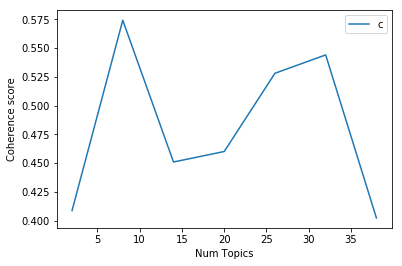

In [28]:
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [29]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4087
Num Topics = 8  has Coherence Value of 0.5741
Num Topics = 14  has Coherence Value of 0.4509
Num Topics = 20  has Coherence Value of 0.46
Num Topics = 26  has Coherence Value of 0.528
Num Topics = 32  has Coherence Value of 0.544
Num Topics = 38  has Coherence Value of 0.4023


If the coherence score seems to keep increasing, it may make better sense to pick the model that gave the highest CV before flattening out. This is exactly the case here. I will pick the one with 32 topics

In [30]:
optimal_model = model_list[-2]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.003*"help" + 0.003*"score" + 0.003*"report" + 0.003*"month" + '
  '0.003*"last" + 0.003*"decrease" + 0.003*"gone" + 0.003*"point" + '
  '0.003*"find" + 0.003*"reviewed"'),
 (1,
  '0.034*"payment" + 0.029*"mortgage" + 0.020*"bb" + 0.020*"biweekly" + '
  '0.015*"amount" + 0.015*"customer" + 0.015*"offer" + 0.015*"website" + '
  '0.015*"pay" + 0.010*"s"'),
 (2,
  '0.016*"one" + 0.016*"let" + 0.016*"capital" + 0.016*"monitoring" + '
  '0.016*"spending" + 0.016*"access" + 0.016*"program" + 0.016*"sign" + '
  '0.016*"tried" + 0.016*"account"'),
 (3,
  '0.034*"credit" + 0.026*"xxxx" + 0.026*"told" + 0.026*"navient" + '
  '0.018*"score" + 0.018*"loan" + 0.018*"bureau" + 0.018*"balance" + '
  '0.018*"delinquency" + 0.010*"help"'),
 (4,
  '0.026*"closing" + 0.026*"xxxx" + 0.020*"account" + 0.015*"rate" + '
  '0.015*"fixed" + 0.013*"bank" + 0.013*"would" + 0.013*"form" + '
  '0.013*"property" + 0.011*"disclosure"')]


### 4.6 Finding the dominant topic in each sentence

***



One of the practical application of topic modeling is to determine what topic a given document is about.

To find that, we find the topic number that has the highest percentage contribution in that document.

The format_topics_sentences() function below nicely aggregates this information in a presentable table.

In [31]:
def format_topics_sentences(ldamodel=ldamodel, corpus=doc_term_matrix, texts=doc_clean):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=doc_term_matrix, texts=doc_clean)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
### 4.6 Finding the dominant topic in each sentence
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.9864,"credit, xxxx, told, navient, score, loan, bure...","[loan, switched, navient, never, told, deliqui..."
1,1,2.0,0.9271,"one, let, capital, monitoring, spending, acces...","[tried, sign, spending, monitoring, program, c..."
2,2,1.0,0.9946,"payment, mortgage, bb, biweekly, amount, custo...","[mortgage, bb, bank, recently, investigating, ..."
3,3,4.0,0.9979,"closing, xxxx, account, rate, fixed, bank, wou...","[entire, lending, experience, citizen, bank, t..."
4,4,4.0,0.9712,"closing, xxxx, account, rate, fixed, bank, wou...","[credit, score, gone, xxxx, point, last, month..."


### 4.6 Find the most representative document for each topic

***


Sometimes just the topic keywords may not be enough to make sense of what a topic is about. So, to help with understanding the topic, you can find the documents a given topic has contributed to the most and infer the topic by reading that document.

In [32]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,1.0,0.9946,"payment, mortgage, bb, biweekly, amount, custo...","[mortgage, bb, bank, recently, investigating, ..."
1,2.0,0.9271,"one, let, capital, monitoring, spending, acces...","[tried, sign, spending, monitoring, program, c..."
2,3.0,0.9864,"credit, xxxx, told, navient, score, loan, bure...","[loan, switched, navient, never, told, deliqui..."
3,4.0,0.9979,"closing, xxxx, account, rate, fixed, bank, wou...","[entire, lending, experience, citizen, bank, t..."


### 4.6 Topic distribution across documents

***

Finally, we want to understand the volume and distribution of topics in order to judge how widely it was discussed. The below table exposes that information.

In [33]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0,3.0,"credit, xxxx, told, navient, score, loan, bure...",NaN,NaN
1,2.0,"one, let, capital, monitoring, spending, acces...",1.0,0.2
2,1.0,"payment, mortgage, bb, biweekly, amount, custo...",1.0,0.2
3,4.0,"closing, xxxx, account, rate, fixed, bank, wou...",1.0,0.2
4,4.0,"closing, xxxx, account, rate, fixed, bank, wou...",2.0,0.4


/Users/Arunabh/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/Arunabh/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/Arunabh/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/Arunabh/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
/Users/Arunabh/anaconda3/lib/python3.7/site-pa

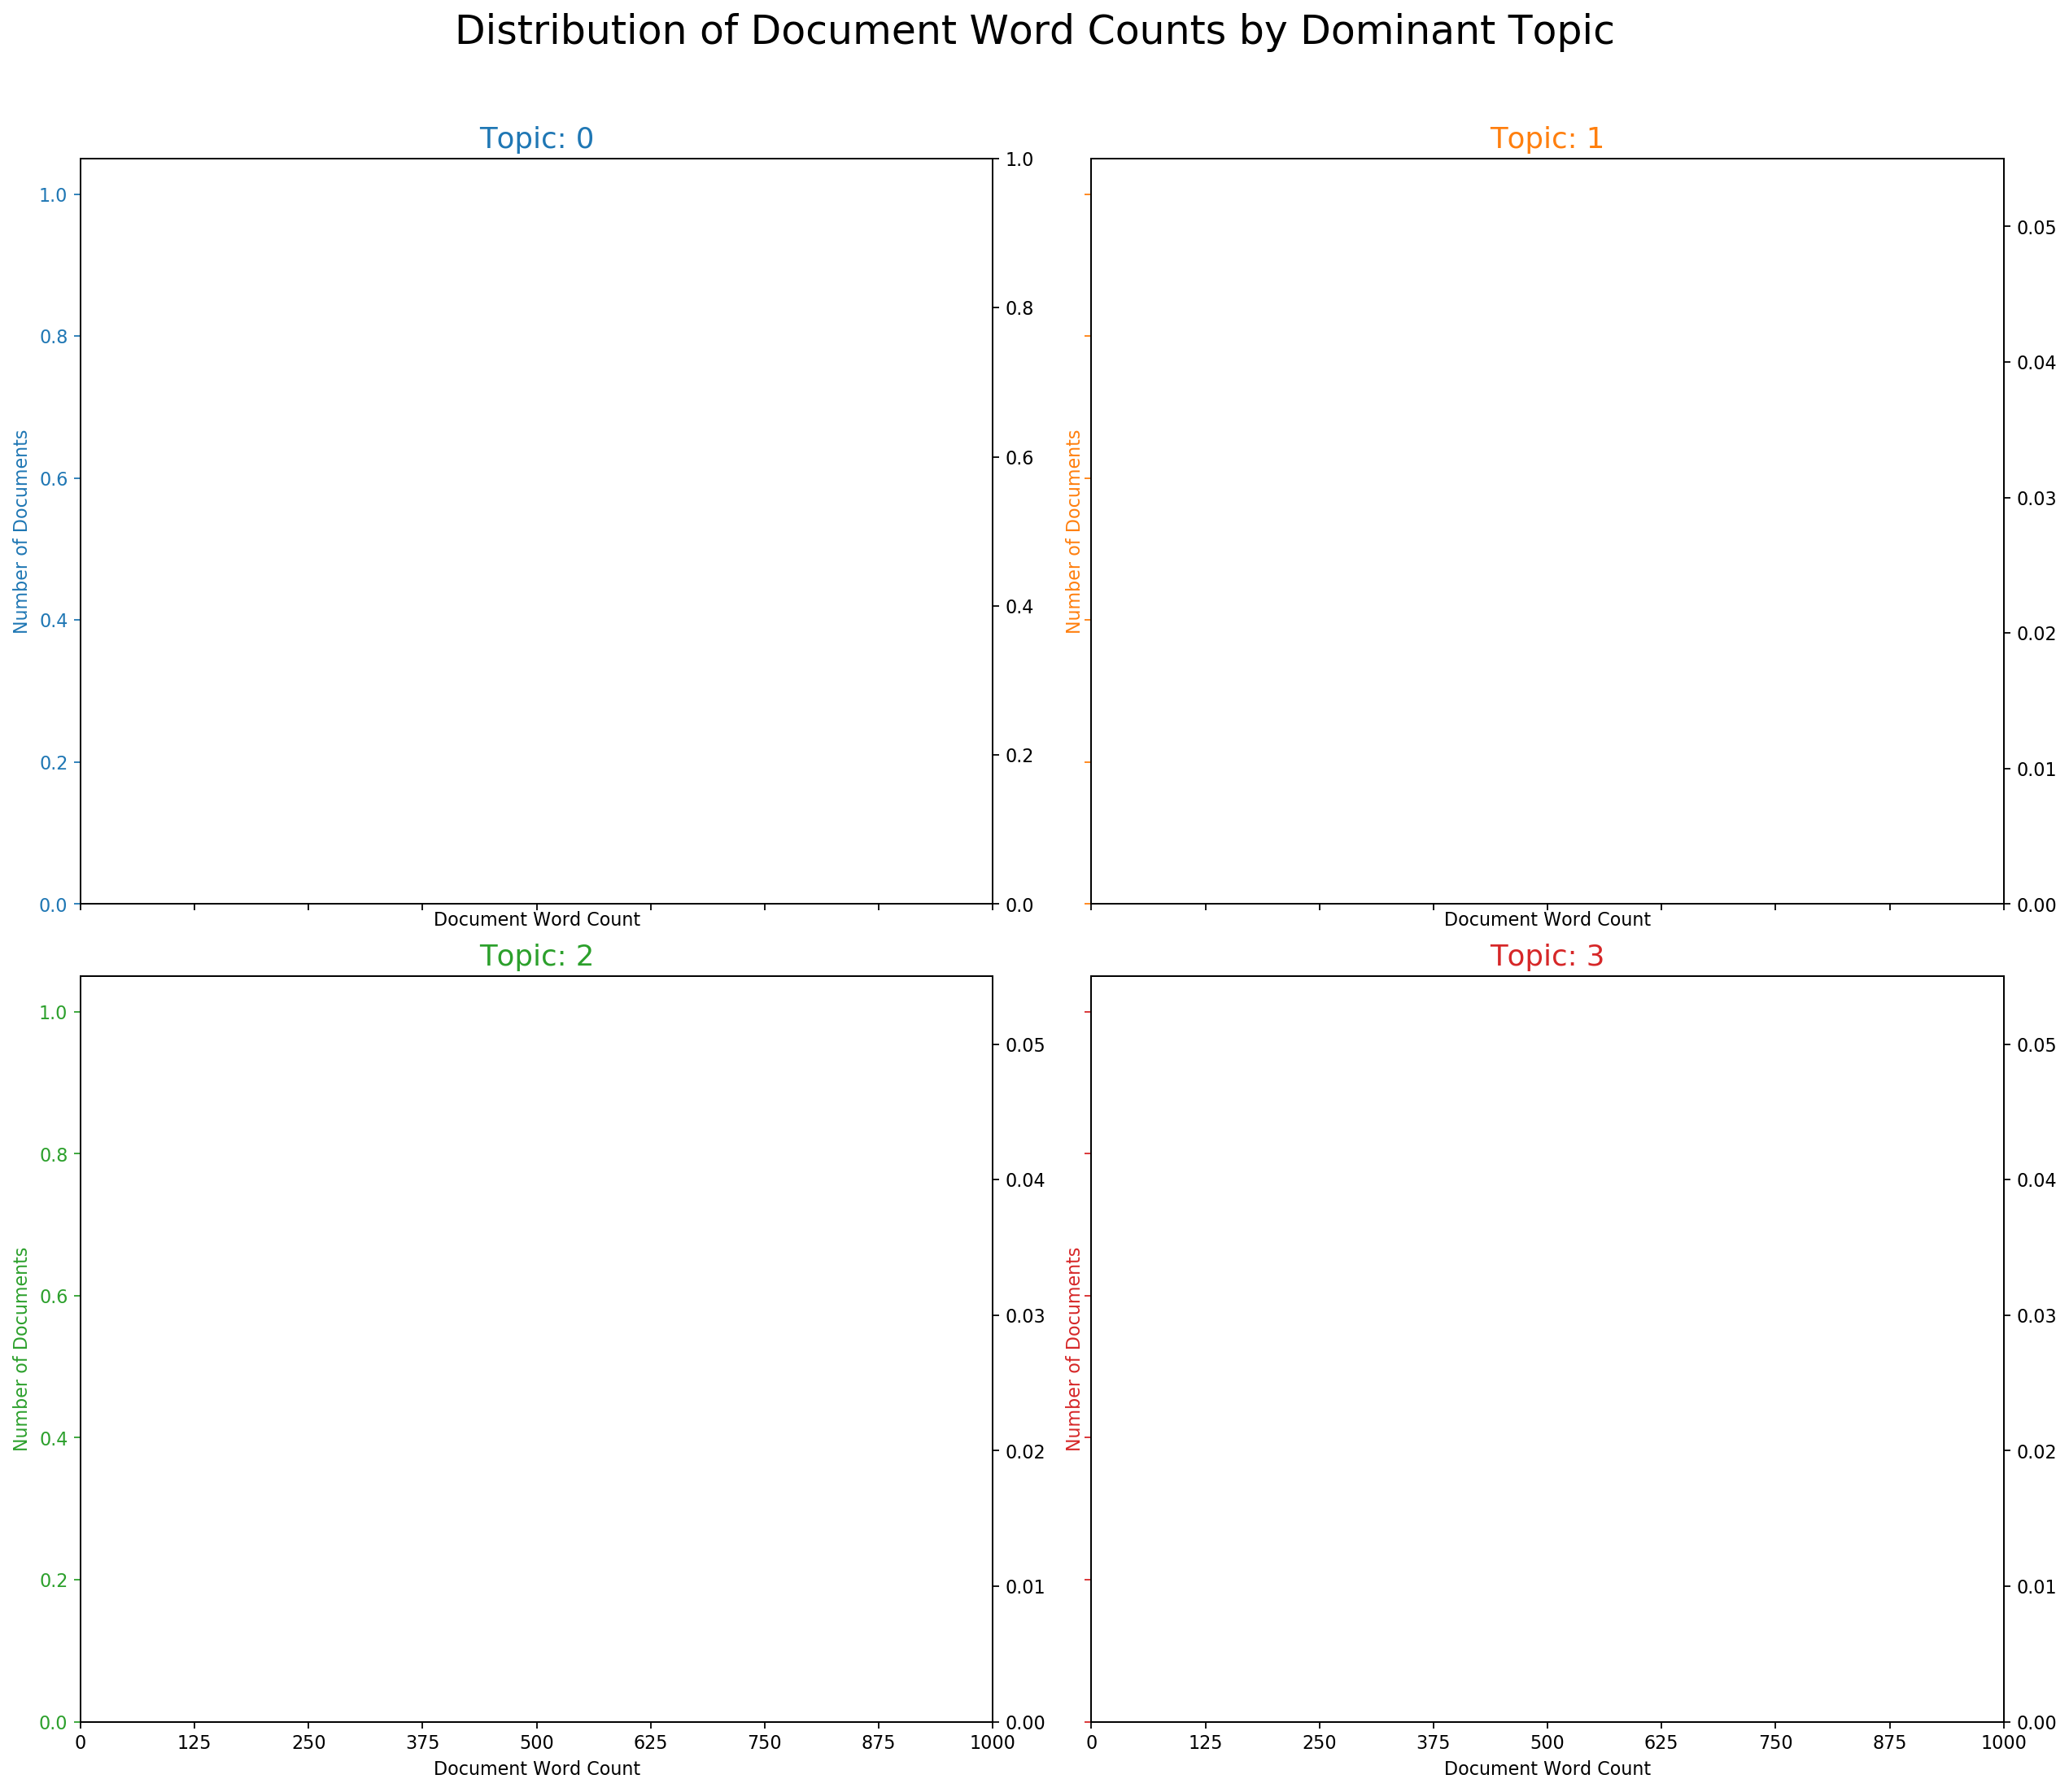

In [34]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()


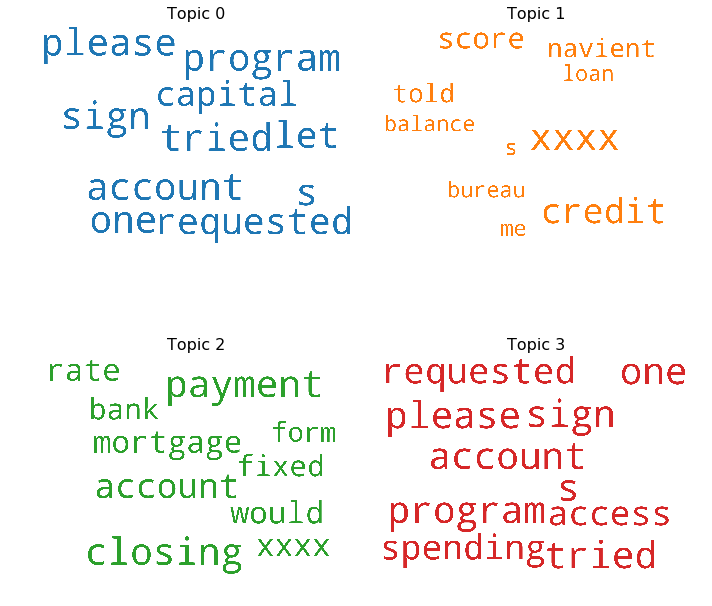

In [35]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [36]:
!pip install wordcloud

In [37]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
print (set(stopwords.words('english')))

{"aren't", 'most', 'out', 'we', 'each', 'yours', 'hers', 'because', 'ma', 'for', 'my', "couldn't", 'just', 'am', 'than', 'at', 'ours', 'doing', 'haven', 'had', "that'll", 'from', 'our', 'the', 'more', 'wasn', 'same', 's', "hasn't", 'needn', "you've", 'with', "mustn't", 'but', 'to', 'whom', "it's", 'an', 'didn', 'how', 'of', "isn't", 'been', 'themselves', 'having', 'during', 'some', 'after', 'and', 'off', 'under', 'theirs', 't', 'itself', 'only', 'where', 'against', 'into', 'o', 'ourselves', 'any', "needn't", 'here', 'yourselves', 'shouldn', "you're", 'by', 'were', 'myself', 'on', 'their', "wasn't", 'not', 'while', 'be', 'who', 'y', "she's", "you'll", 'shan', 'them', 'when', "don't", 'does', 'its', 'those', 'hasn', 'doesn', 'over', 'too', 'nor', 'he', 'aren', 'once', 'll', 'couldn', "shan't", 'up', 'then', 'they', 'was', 'have', 'about', 'if', 'through', 'below', 'further', 'as', 'can', 'until', 'a', 'now', 'has', "won't", 'weren', 'between', 'me', 'above', "mightn't", 'own', 'her', 'be

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Arunabh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


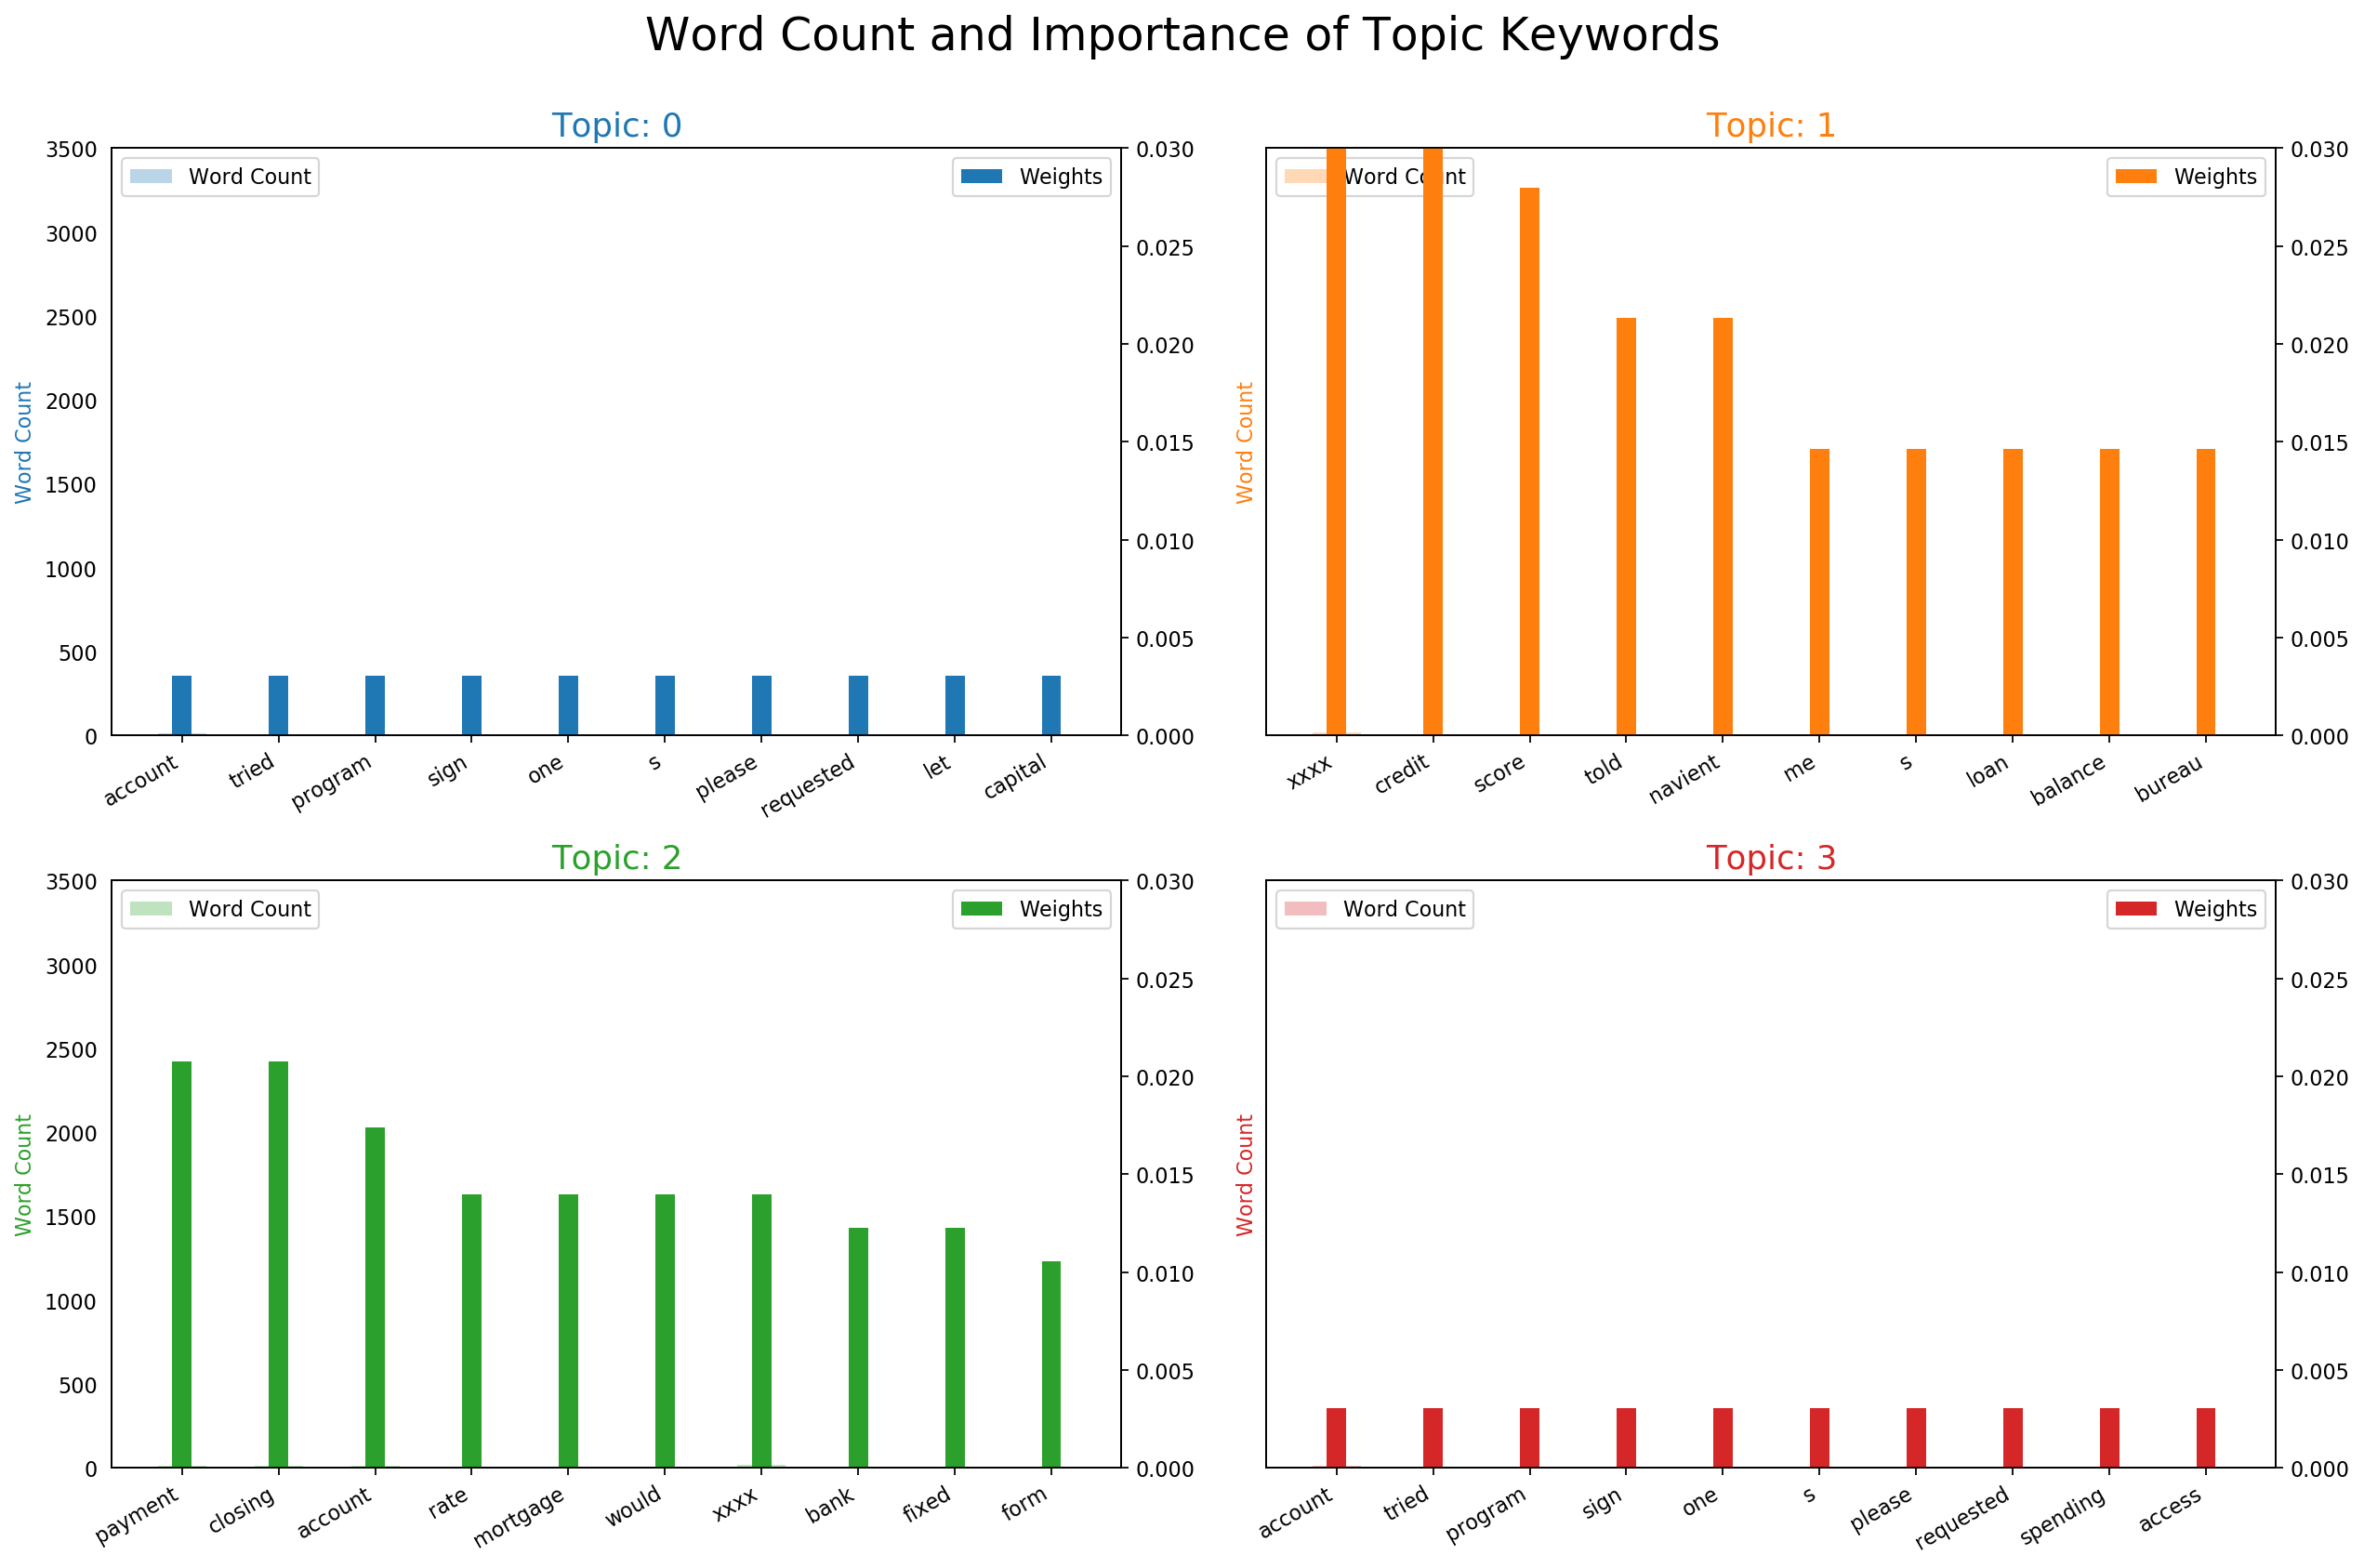

In [38]:
from collections import Counter
topics = ldamodel.show_topics(formatted=False)
data_flat = [w for w_list in doc_clean for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()